<a href="https://colab.research.google.com/github/davidzimniok/MPA-MLF/blob/main/MINIPROJECT01/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

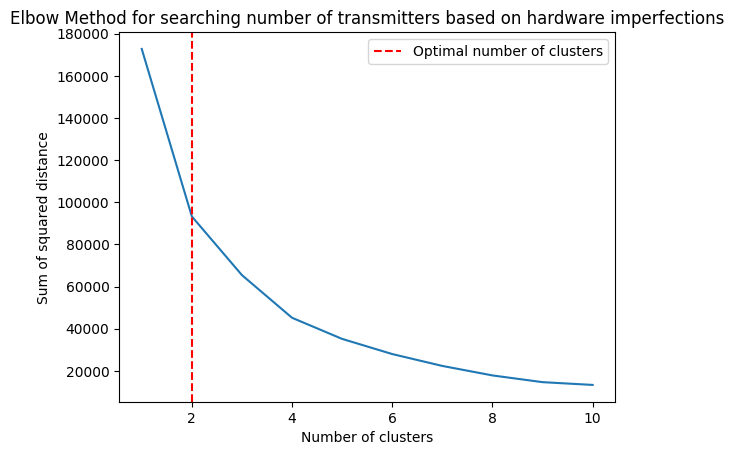

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    14376
1     4824
Name: Cluster, dtype: int64


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#connect to the google drive
from google.colab import drive
drive.mount('/content/drive')

#load dataset from folder at drive
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projekt01/Data_prepared_final.csv")

#delete features as time and number of row - data starts at 3rd column
data=data.iloc[:,2:]

#apply scaling to the dataset
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

#array for calculated sum of squres of distances of each point to centroid that is attached to
all_objective=[]

#calculate K-means for 1 to 10 clusters and calculate
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    all_objective.append(kmeans.inertia_)

#calculate diference to get the optimal number of clusters
differenced=np.diff(np.diff(all_objective))

#find maximal diference between data - add 2, because 0 is 1 and difference is performed
optimal_index=np.argmax(differenced)+2

#plot elbow
plt.plot(range(1, 11),all_objective)
plt.title('Elbow Method for searching number of transmitters based on hardware imperfections')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.axvline(x=optimal_index,color='r',linestyle='--',label='Optimal number of clusters')
plt.legend()
plt.show()

#calculate KMeans for the best number of clusters
kmeans=KMeans(n_clusters=optimal_index,init='k-means++',random_state=42)
kmeans.fit(scaled_data)

#add labels to the dataset
data['Cluster'] = kmeans.labels_

#print number of data points attached to the each centroid
print(data['Cluster'].value_counts())